In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest
from sklearn.cluster import KMeans, DBSCAN
from sklearn.neighbors import NearestNeighbors
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_predict

import tqdm

%matplotlib inline

/opt/conda/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
import sherlock

In [3]:
df =  pd.read_csv("./data/Dataset_Anomaly_Init_R2.csv") # dataset
sec = pd.read_csv("./data/Dataset_Anomaly_Secret_R2.csv") # megoldas

In [4]:
df.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,ID
0,8,10,12,8,9,10,6,2,5,9,5,7,8,7,2,8,0
1,4,2,5,3,3,8,6,6,4,6,7,8,7,6,2,6,1
2,2,0,3,1,1,7,8,4,0,7,8,8,7,9,0,8,2
3,2,3,3,2,2,7,9,5,4,7,6,7,5,9,2,7,3
4,5,9,8,7,5,7,9,2,4,10,5,6,5,9,1,7,4


In [5]:
df.shape

(2467, 17)

In [6]:
expert = sherlock.Sherlock(sec,111) # kezzel irt script, ami az anomalianak utananezo szakembert szimulalja

In [7]:
# 0. lepes - veletelen minta, hogy legyen elkepzelesunk az anomalia - nem anomalia aranyrol

In [8]:
random_sample = df.sample(10, random_state=1)

In [9]:
expert.investigate(random_sample['ID'])

	Nyomozás eredménye	481	->	ok
	Nyomozás eredménye	1937	->	ok
	Nyomozás eredménye	280	->	csalás
	Nyomozás eredménye	440	->	ok
	Nyomozás eredménye	107	->	ok
	Nyomozás eredménye	768	->	ok
	Nyomozás eredménye	2209	->	ok
	Nyomozás eredménye	1233	->	ok
	Nyomozás eredménye	1730	->	ok
	Nyomozás eredménye	2041	->	ok


In [10]:
expert.stat()

Adathalmaz mérete   = 2467
Ismert esetek száma = 10 		max: 111
  Ismert csalás = 1
  Felderítési arány = 10.0%


In [11]:
df = expert.add_label(df,'info')

In [12]:
df

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,ID,info
0,8,10,12,8,9,10,6,2,5,9,5,7,8,7,2,8,0,no_info
1,4,2,5,3,3,8,6,6,4,6,7,8,7,6,2,6,1,no_info
2,2,0,3,1,1,7,8,4,0,7,8,8,7,9,0,8,2,no_info
3,2,3,3,2,2,7,9,5,4,7,6,7,5,9,2,7,3,no_info
4,5,9,8,7,5,7,9,2,4,10,5,6,5,9,1,7,4,no_info
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2462,3,7,4,5,4,8,6,5,4,7,7,8,7,5,2,7,2462,no_info
2463,7,7,7,5,5,6,10,4,3,8,7,7,9,13,3,4,2463,no_info
2464,10,10,9,8,9,5,11,4,3,8,7,7,10,12,4,5,2464,no_info
2465,3,5,4,4,4,8,6,6,4,7,7,8,7,5,2,7,2465,no_info


In [13]:
df['info'].value_counts()

no_info    2457
ok            9
csalás        1
Name: info, dtype: int64

In [14]:
# 1. ISO FOREST

In [15]:
model = IsolationForest(random_state = 1)

In [16]:
X_cols = [str(col) for col in range(1, 17)]

In [17]:
X = df.loc[:, X_cols]

In [18]:
X.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,8,10,12,8,9,10,6,2,5,9,5,7,8,7,2,8
1,4,2,5,3,3,8,6,6,4,6,7,8,7,6,2,6
2,2,0,3,1,1,7,8,4,0,7,8,8,7,9,0,8
3,2,3,3,2,2,7,9,5,4,7,6,7,5,9,2,7
4,5,9,8,7,5,7,9,2,4,10,5,6,5,9,1,7


In [19]:
scaler = StandardScaler()

In [20]:
X_scaled = scaler.fit_transform(X)

In [21]:
scaled_df = pd.DataFrame(X_scaled, index=df.index, columns=[col + '_scaled' for col in X_cols])

In [22]:
df = pd.concat([df, scaled_df], axis=1)

In [23]:
df.head()

,1,2,3,4,5,6,7,8,9,10,...,7_scaled,8_scaled,9_scaled,10_scaled,11_scaled,12_scaled,13_scaled,14_scaled,15_scaled,16_scaled
0,8,10,12,8,9,10,6,2,5,9,...,-0.966892,-0.961443,1.019124,0.743981,-0.919737,-0.575949,0.541410,-0.587294,0.073593,0.568823
1,4,2,5,3,3,8,6,6,4,6,...,-0.966892,0.184116,0.444060,-0.749024,0.012853,0.162547,0.090022,-1.046228,0.073593,-0.954831
2,2,0,3,1,1,7,8,4,0,7,...,0.107820,-0.388663,-1.856195,-0.251356,0.479148,0.162547,0.090022,0.330574,-0.921228,0.568823
3,2,3,3,2,2,7,9,5,4,7,...,0.645176,-0.102274,0.444060,-0.251356,-0.453442,-0.575949,-0.812756,0.330574,0.073593,-0.193004
4,5,9,8,7,5,7,9,2,4,10,...,0.645176,-0.961443,0.444060,1.241649,-0.919737,-1.314445,-0.812756,0.330574,-0.423817,-0.193004


In [24]:
X_cols = [col + '_scaled' for col in X_cols]

In [25]:
X = df.loc[:, X_cols]

In [26]:
X.head()

,1_scaled,2_scaled,3_scaled,4_scaled,5_scaled,6_scaled,7_scaled,8_scaled,9_scaled,10_scaled,11_scaled,12_scaled,13_scaled,14_scaled,15_scaled,16_scaled
0,1.512175,0.859290,2.498127,1.248786,1.780931,1.559530,-0.966892,-0.961443,1.019124,0.743981,-0.919737,-0.575949,0.541410,-0.587294,0.073593,0.568823
1,-0.380537,-1.509278,-0.533081,-1.075259,-0.585437,0.549592,-0.966892,0.184116,0.444060,-0.749024,0.012853,0.162547,0.090022,-1.046228,0.073593,-0.954831
2,-1.326893,-2.101420,-1.399140,-2.004877,-1.374226,0.044622,0.107820,-0.388663,-1.856195,-0.251356,0.479148,0.162547,0.090022,0.330574,-0.921228,0.568823
3,-1.326893,-1.213207,-1.399140,-1.540068,-0.979832,0.044622,0.645176,-0.102274,0.444060,-0.251356,-0.453442,-0.575949,-0.812756,0.330574,0.073593,-0.193004
4,0.092641,0.563219,0.766008,0.783977,0.203352,0.044622,0.645176,-0.961443,0.444060,1.241649,-0.919737,-1.314445,-0.812756,0.330574,-0.423817,-0.193004


In [27]:
model.fit(X)

IsolationForest(random_state=1)

In [28]:
df['pred_iso'] = model.predict(X)

/opt/conda/lib/python3.9/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


In [29]:
df['pred_iso'].value_counts()

 1    2203
-1     264
Name: pred_iso, dtype: int64

In [30]:
df['pred_iso_score'] = model.decision_function(X)

<AxesSubplot:>

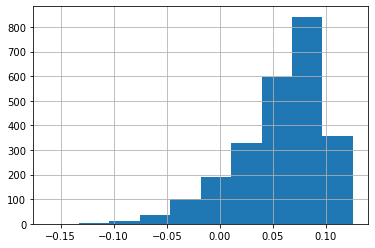

In [31]:
df['pred_iso_score'].hist()

<AxesSubplot:>

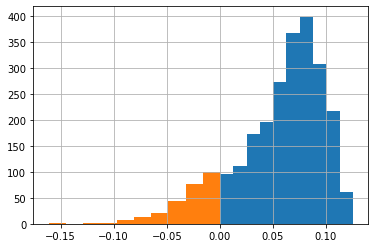

In [32]:
df.loc[df['pred_iso']==1, 'pred_iso_score'].hist()
df.loc[df['pred_iso']==-1, 'pred_iso_score'].hist()

In [33]:
iso_to_check = df.sort_values('pred_iso_score').head(10)

In [34]:
expert.investigate(iso_to_check['ID'])

	Nyomozás eredménye	1106	->	csalás
	Nyomozás eredménye	2460	->	csalás
	Nyomozás eredménye	2144	->	csalás
	Nyomozás eredménye	2279	->	ok
	Nyomozás eredménye	950	->	ok
	Nyomozás eredménye	2033	->	csalás
	Nyomozás eredménye	908	->	csalás
	Nyomozás eredménye	1455	->	csalás
	Nyomozás eredménye	2129	->	csalás
	Nyomozás eredménye	1854	->	ok


In [35]:
expert.stat()

Adathalmaz mérete   = 2467
Ismert esetek száma = 20 		max: 111
  Ismert csalás = 8
  Felderítési arány = 40.0%


In [36]:
df = expert.add_label(df, 'info')

In [37]:
df['info'].value_counts()

no_info    2447
ok           12
csalás        8
Name: info, dtype: int64

In [38]:
# 2/a klaszterezes - kmeans

In [39]:
sse_list = []
for i in tqdm.tqdm(range(1, 15)):
    kmeans = KMeans(n_clusters=i, random_state=1)
    kmeans.fit(X)
    sse_list.append(kmeans.inertia_)

100%|██████████| 14/14 [00:09<00:00,  1.55it/s]


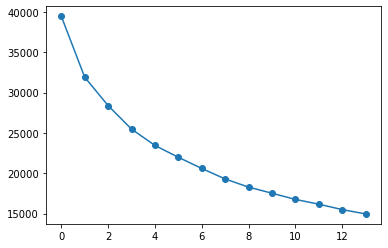

In [40]:
plt.plot(sse_list, marker='o')

In [41]:
kmeans = KMeans(n_clusters=6, random_state=1)

In [42]:
df['cluster_kmeans'] = kmeans.fit_predict(X)

In [43]:
df['cluster_kmeans'].value_counts()

1    563
0    479
2    470
3    411
4    302
5    242
Name: cluster_kmeans, dtype: int64

In [44]:
df.groupby(['cluster_kmeans', 'info']).size().reset_index()

,cluster_kmeans,info,0
0,0,no_info,479
1,1,csalás,6
2,1,no_info,555
3,1,ok,2
4,2,no_info,468
5,2,ok,2
6,3,csalás,1
7,3,no_info,407
8,3,ok,3
9,4,csalás,1


In [45]:
cluster_df = df.loc[df['cluster_kmeans']==1, :].reset_index(drop=True)

In [46]:
X_cluster = cluster_df.loc[:, X_cols]

In [47]:
cluster_df['sub_cluster'] = kmeans.fit_predict(X_cluster)

In [48]:
cluster_df.groupby(['sub_cluster', 'info']).size()

sub_cluster  info   
0            no_info    161
             ok           1
1            no_info     97
2            no_info    104
             ok           1
3            csalás       2
             no_info     11
4            csalás       4
             no_info    101
5            no_info     81
dtype: int64

<AxesSubplot:xlabel='sub_cluster'>

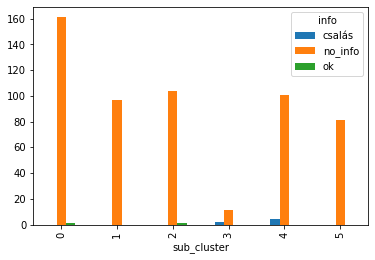

In [49]:
cluster_df.groupby(['sub_cluster', 'info']).size().unstack().plot(kind='bar')

In [50]:
cluster_to_check = cluster_df.loc[(cluster_df['sub_cluster']==3)&
                                  (cluster_df['info']=='no_info'), :]

In [51]:
expert.investigate(cluster_to_check['ID'])

	Nyomozás eredménye	127	->	csalás
	Nyomozás eredménye	208	->	csalás
	Nyomozás eredménye	360	->	csalás
	Nyomozás eredménye	553	->	csalás
	Nyomozás eredménye	629	->	csalás
	Nyomozás eredménye	828	->	csalás
	Nyomozás eredménye	1049	->	csalás
	Nyomozás eredménye	1069	->	csalás
	Nyomozás eredménye	1386	->	csalás
	Nyomozás eredménye	1512	->	csalás
	Nyomozás eredménye	2399	->	csalás


In [52]:
df = expert.add_label(df, 'info')

In [53]:
df['info'].value_counts()

no_info    2436
csalás       19
ok           12
Name: info, dtype: int64

In [54]:
expert.stat()

Adathalmaz mérete   = 2467
Ismert esetek száma = 31 		max: 111
  Ismert csalás = 19
  Felderítési arány = 61.3%


In [55]:
# 2/b klaszterezes - dbscan + nearestneighbor

In [56]:
model = DBSCAN(eps=0.5)

model.fit(X)

df['dbscan_cluster'] = model.labels_

In [57]:
df['dbscan_cluster'].value_counts()

-1     2252
 6       28
 1       22
 3       19
 8       19
 5       14
 12      14
 4       12
 9       11
 11      11
 2        8
 13       8
 17       8
 18       7
 7        6
 0        6
 10       6
 15       6
 14       5
 16       5
Name: dbscan_cluster, dtype: int64

In [58]:
# hatarozzuk meg optimalist epszilont

In [59]:
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(X)
distances, indices = nbrs.kneighbors(X)

<AxesSubplot:>

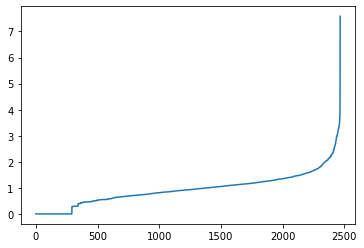

In [60]:
# az optimalis epszilon az az y(tavolsag) pont, ahol a gorbe meredeken elkezd emelkedni
pd.Series(distances[:, 1]).sort_values().reset_index(drop=True).plot()

In [61]:
df['nearest_distance']= distances[:, 1]

In [62]:
nearest_to_check = df.loc[df['info']=='no_info', :].sort_values('nearest_distance', ascending=False)[:10]

In [63]:
expert.investigate(nearest_to_check['ID'])

	Nyomozás eredménye	1542	->	csalás
	Nyomozás eredménye	2131	->	csalás
	Nyomozás eredménye	2178	->	csalás
	Nyomozás eredménye	1578	->	csalás
	Nyomozás eredménye	1382	->	csalás
	Nyomozás eredménye	1047	->	csalás
	Nyomozás eredménye	86	->	csalás
	Nyomozás eredménye	2361	->	csalás
	Nyomozás eredménye	92	->	csalás
	Nyomozás eredménye	1385	->	csalás


In [64]:
expert.stat()

Adathalmaz mérete   = 2467
Ismert esetek száma = 41 		max: 111
  Ismert csalás = 29
  Felderítési arány = 70.7%


In [65]:
df = expert.add_label(df, 'info')

<AxesSubplot:>

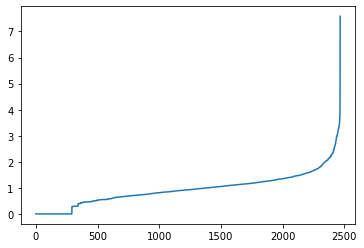

In [66]:
df['nearest_distance'].sort_values().reset_index(drop=True).plot()

In [67]:
model = DBSCAN(eps=3)

model.fit(X)

df['cluster_dbscan'] = model.labels_

In [68]:
df['cluster_dbscan'].value_counts()

 0    2418
-1      44
 1       5
Name: cluster_dbscan, dtype: int64

In [69]:
dbscan_to_check = df.loc[(df['cluster_dbscan']!=0)&(df['info']=='no_info'), :].head(10)

In [70]:
expert.investigate(dbscan_to_check['ID'])

	Nyomozás eredménye	419	->	csalás
	Nyomozás eredménye	592	->	csalás
	Nyomozás eredménye	683	->	csalás
	Nyomozás eredménye	869	->	csalás
	Nyomozás eredménye	948	->	csalás
	Nyomozás eredménye	997	->	csalás
	Nyomozás eredménye	1035	->	csalás
	Nyomozás eredménye	1217	->	csalás
	Nyomozás eredménye	1322	->	csalás
	Nyomozás eredménye	1337	->	csalás


In [71]:
df = expert.add_label(df, 'info')

In [72]:
df['info'].value_counts()

no_info    2416
csalás       39
ok           12
Name: info, dtype: int64

In [73]:
expert.stat()

Adathalmaz mérete   = 2467
Ismert esetek száma = 51 		max: 111
  Ismert csalás = 39
  Felderítési arány = 76.5%


In [74]:
# 3. felugyelt tanulas - logreg

In [75]:
model = LogisticRegression()

In [76]:
info_map = {value:i for i, value in enumerate(df['info'].unique())}

In [77]:
df['info_num'] = df['info'].map(info_map)

In [78]:
y_col = 'info_num'

In [79]:
X = df.loc[:, X_cols]

In [80]:
y = df.loc[:, y_col]

In [81]:
y.value_counts()

0    2416
1      39
2      12
Name: info_num, dtype: int64

In [82]:
pred_proba = cross_val_predict(model, X, y, cv=4, method='predict_proba')

In [83]:
pred_proba

array([[9.79496125e-01, 2.28701880e-05, 2.04810044e-02],
       [9.93229782e-01, 1.25402947e-04, 6.64481516e-03],
       [9.95256873e-01, 1.26376256e-05, 4.73048960e-03],
       ...,
       [9.98540512e-01, 6.54035676e-06, 1.45294796e-03],
       [9.99272616e-01, 9.66545752e-05, 6.30728950e-04],
       [9.97850698e-01, 1.07290196e-03, 1.07640000e-03]])

In [84]:
df.loc[:, ['pred_noinfo', 'pred_cs', 'pred_ok']] = pred_proba

In [85]:
df.groupby('info')['pred_cs', 'pred_noinfo', 'pred_ok'].mean()

/tmp/ipykernel_35258/672262353.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby('info')['pred_cs', 'pred_noinfo', 'pred_ok'].mean()


,pred_cs,pred_noinfo,pred_ok
info,,,
csalás,0.522762,0.473851,0.003386
no_info,0.006718,0.988849,0.004433
ok,0.002136,0.973360,0.024504


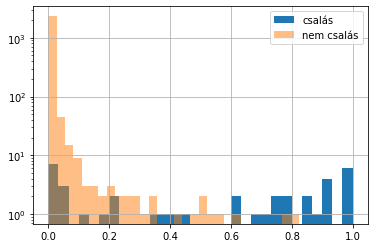

In [86]:
df.loc[df['info']=='csalás', 'pred_cs'].hist(bins=30, label='csalás')
df.loc[df['info']!='csalás', 'pred_cs'].hist(bins=30, label='nem csalás', alpha=0.5)
plt.yscale('log')
plt.legend()

In [87]:
logreg_to_check = df.loc[df['info']=='no_info'].sort_values('pred_cs', ascending=False).head(10)

In [88]:
expert.investigate(logreg_to_check['ID'])

	Nyomozás eredménye	1052	->	csalás
	Nyomozás eredménye	2098	->	csalás
	Nyomozás eredménye	1666	->	csalás
	Nyomozás eredménye	2438	->	csalás
	Nyomozás eredménye	2122	->	csalás
	Nyomozás eredménye	1592	->	csalás
	Nyomozás eredménye	1642	->	csalás
	Nyomozás eredménye	1885	->	csalás
	Nyomozás eredménye	2334	->	csalás
	Nyomozás eredménye	1151	->	csalás


In [89]:
df = expert.add_label(df, 'info')

In [90]:
df['info'].value_counts()

no_info    2406
csalás       49
ok           12
Name: info, dtype: int64

In [91]:
expert.stat()

Adathalmaz mérete   = 2467
Ismert esetek száma = 61 		max: 111
  Ismert csalás = 49
  Felderítési arány = 80.3%


In [92]:
# 4. felugyelt tanulas - kombinalt

In [93]:
df['pred_iso'].value_counts()

 1    2203
-1     264
Name: pred_iso, dtype: int64

In [94]:
df['cluster_dbscan'].value_counts()

 0    2418
-1      44
 1       5
Name: cluster_dbscan, dtype: int64

In [95]:
df['pred_cs'].value_counts()

0.000205    4
0.000142    3
0.003755    3
0.000124    3
0.000255    3
           ..
0.000001    1
0.007339    1
0.000226    1
0.000011    1
0.001073    1
Name: pred_cs, Length: 2393, dtype: int64

In [96]:
df['combined_score'] =\
((df['pred_iso']*-1) + (df['cluster_dbscan'].apply(lambda x: 1 if x!=0 else -1)) + (df['pred_cs'] - df['pred_ok']))

In [97]:
combined_to_check = df.loc[df['info']=='no_info', :].sort_values('combined_score', ascending=False).head(50)

In [98]:
expert.investigate(combined_to_check['ID'])

	Nyomozás eredménye	2219	->	csalás
	Nyomozás eredménye	2197	->	csalás
	Nyomozás eredménye	1535	->	csalás
	Nyomozás eredménye	1965	->	csalás
	Nyomozás eredménye	2283	->	csalás
	Nyomozás eredménye	1942	->	csalás
	Nyomozás eredménye	1522	->	csalás
	Nyomozás eredménye	929	->	csalás
	Nyomozás eredménye	676	->	csalás
	Nyomozás eredménye	1135	->	ok
	Nyomozás eredménye	361	->	csalás
	Nyomozás eredménye	244	->	csalás
	Nyomozás eredménye	593	->	csalás
	Nyomozás eredménye	2066	->	csalás
	Nyomozás eredménye	733	->	csalás
	Nyomozás eredménye	1571	->	csalás
	Nyomozás eredménye	1189	->	ok
	Nyomozás eredménye	507	->	csalás
	Nyomozás eredménye	1452	->	csalás
	Nyomozás eredménye	1828	->	ok
	Nyomozás eredménye	2157	->	csalás
	Nyomozás eredménye	1457	->	csalás
	Nyomozás eredménye	1253	->	csalás
	Nyomozás eredménye	1565	->	csalás
	Nyomozás eredménye	760	->	ok
	Nyomozás eredménye	267	->	csalás
	Nyomozás eredménye	2153	->	ok
	Nyomozás eredménye	1906	->	csalás
	Nyomozás eredménye	1359	->	ok
	Nyomozás eredmény

In [99]:
df = expert.add_label(df, 'info')

In [100]:
df['info'].value_counts()

no_info    2356
csalás       82
ok           29
Name: info, dtype: int64

In [101]:
expert.stat()

Adathalmaz mérete   = 2467
Ismert esetek száma = 111 		max: 111
  Ismert csalás = 82
  Felderítési arány = 73.9%


In [102]:
# 5. mogottes adatok

In [103]:
sec['info'].value_counts()

ok          2326
anomalia     141
Name: info, dtype: int64

In [104]:
df.loc[df['info']=='csalás', :].shape[0] / sec.loc[sec['info']=='anomalia', :].shape[0]

0.5815602836879432

In [105]:
sec.loc[sec['info']=='anomalia', :].shape[0] / sec.shape[0]

0.05715443858937981